In [0]:
#This is a scalar regression problem!

#loading the Boston housing dataset
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [0]:
#normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [0]:
#model definition

from keras import models, layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

#network ends with single unit and no activation. Typical setup for scalar ergression -
#predicting a single continuous value
#we often use MSE, mean squared error for this type of qns

  

In [0]:
#K-fold validation

import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]],
      axis=0)
  
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]],
      axis=0)
  
  
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size = 1,
           verbose = 0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
np.mean(all_scores)

2.3334327812242037

In [0]:
#we modify to save the validation logs are each fold

num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]],
      axis=0)
  
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]],
      axis=0)
  
  
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size = 1,
           verbose = 0)
  #history.history.keys()
  mae_history = history.history['mean_absolute_error']
  all_mae_histories.append(mae_history)



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
#building the history of successive mean K-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

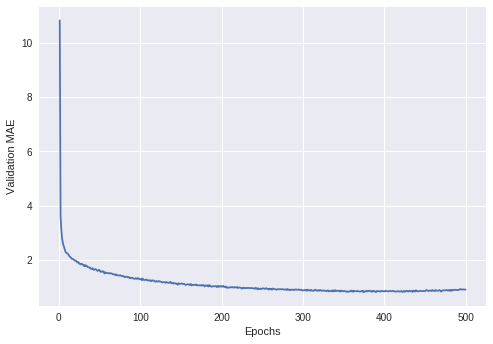

In [0]:
#plotting validation scores

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

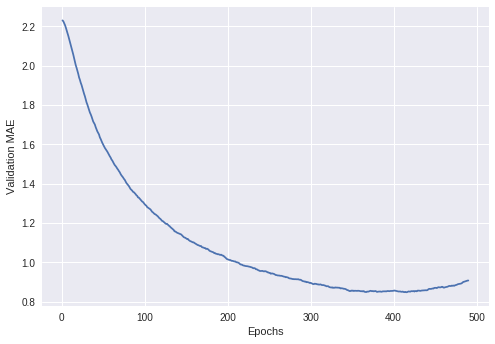

In [0]:
# plotting validation scores, excluding the first 10 data points

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:    # check if the list is not empty
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))   # we doing ema
    else:
      smoothed_points.append(point)
      
  return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [0]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 2ms/step


2.6728868204004623

In [0]:
# THIS ONE NOT ACCURATE. somehow mine is different from the book